In [1]:
import pyedflib
import os
import shutil
import glob
import datetime
import time
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean, sqrt, square, arange
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read raw PPG files
path = r'prof_data\resteaze\00000177-resteaze-sync.csv'
mdf = pd.read_csv(path, sep=',')
mdf.head()

C:\Users\lucki\AppData\Local\Temp\ipykernel_46792\2648183510.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  mdf = pd.read_csv(path, sep=',')


,Unnamed: 0,counter,unixTimes,accelerometerX,accelerometerY,accelerometerZ,capacitorsA,capacitorsB,capacitorsC,gyroscopeX,...,sleep_state,Leg Movement,Hypopnea,Arousal,RERA,Relative Desaturation,Obstructive Apnea,Central Apnea,Leg Movement (L),Leg Movement (R)
0,3430,3428,1643957818001,1321.0,-2998.0,-2570.0,30856.0,NaN,NaN,-113.0,...,-1.0,0,0,0,0,0,0,0,0,0
1,3431,3433,1643957818034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0,0,0,0,0,0,0,0,0
2,3432,3429,1643957818041,1320.0,-2993.0,-2562.0,30858.0,NaN,NaN,-54.0,...,-1.0,0,0,0,0,0,0,0,0,0
3,3433,3434,1643957818074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0,0,0,0,0,0,0,0,0
4,3434,3430,1643957818081,1355.0,-2979.0,-2559.0,30857.0,NaN,NaN,-46.0,...,-1.0,0,0,0,0,0,0,0,0,0


In [3]:
fname = path.split('\\')[-1].split('-')[0]

# TODO: Try to get all the data in one row

In [4]:
# TODO: Add combined epoch data to the dataframe

In [5]:
df = mdf[mdf.sleep_state != -1].reset_index()

df = df[[
    'ledGreen',
    'sleep_state'
]].dropna()
# df['sleep_state'] = df['sleep_state'].mask(lambda col: col == -1, 6)

# Applying the condition
df["sleep_state"] = np.where(df["sleep_state"] == 0, 0, 1)
df.head()

,ledGreen,sleep_state
1,4719.0,0
3,4720.0,0
5,4724.0,0
7,4724.0,0
9,4726.0,0


In [6]:
df['sleep_state'].value_counts()

1    370330
0    169088
Name: sleep_state, dtype: int64

In [7]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

# apply bandpass filter

fs = 25
lowcut = 0.65
highcut = 3.0

df['ledGreen'] = butter_bandpass_filter(df['ledGreen'], lowcut, highcut, fs, order=4)

In [8]:
# plt.plot(df['ledGreen'][800:1024], label='Acc signal (%g Hz)' % 25)
# plt.xlabel('time (ms)')
# plt.grid(True)
# plt.axis('tight')
# plt.legend(loc='upper left')

# plt.show()

# plt.plot(df['ledGreen'][800:1024], label='Bandpass signal (%g Hz)' % 25)
# plt.xlabel('time (ms)')
# plt.grid(True)
# plt.axis('tight')
# plt.legend(loc='upper left')

# plt.show()


# Get the analysis for epochs

bpm: 58.237350
ibi: 1030.266667
sdnn: 226.830176
sdsd: 257.701138
rmssd: 331.729475
pnn20: 0.629630
pnn50: 0.481481
hr_mad: 0.000000
sd1: 223.821406
sd2: 262.071520
s: 184277.079263
sd1/sd2: 0.854047
breathingrate: 0.161770


c:\Users\lucki\anaconda3\envs\tf\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 2500x400 with 0 Axes>

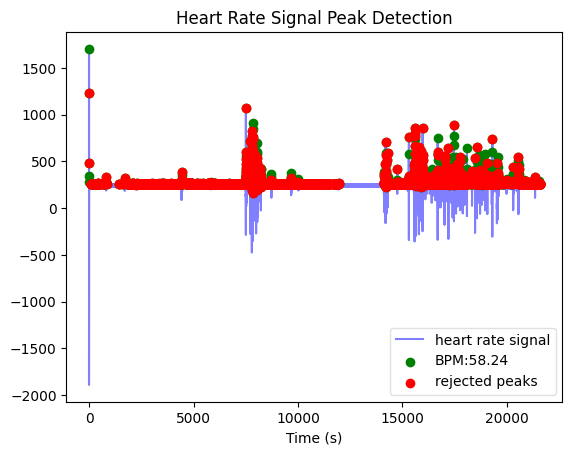

In [9]:
import heartpy as hp

#run the analysis
wd, m = hp.process(np.array(df['ledGreen']), sample_rate=25.0)


#set large figure
plt.figure(figsize=(25,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [10]:
#run the segmented analysis
seg_wd, seg_m = hp.process_segmentwise(np.array(df['ledGreen']), sample_rate=25.0, segment_width = 40, segment_overlap = 0.25)


c:\Users\lucki\anaconda3\envs\tf\lib\site-packages\scipy\interpolate\fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
c:\Users\lucki\anaconda3\envs\tf\lib\site-packages\numpy\ma\core.py:5244: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
c:\Users\lucki\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\lucki\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\lucki\anaconda3\envs\tf\lib\site

In [11]:
hp.segment_plotter(seg_wd, seg_m, title='Heart Rate Signal Peak Detection', figsize=(25, 6), path='heartpy_outputs/{}'.format(fname), start=0, end=None, step=1)

#### Number of accepted and rejected peaks

In [27]:
wd.keys()

dict_keys(['hr', 'sample_rate', 'peaklist', 'ybeat', 'rolling_mean', 'RR_list', 'RR_indices', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor', 'nn20', 'nn50', 'poincare', 'breathing_signal', 'breathing_psd', 'breathing_frq'])

In [34]:
# Rejected peaks
rejectedpeaks = wd['removed_beats']

(rejectedpeaks).shape


(13707,)

In [35]:
# Accepted peaks
peaklist = wd['peaklist']

(np.asarray(peaklist)).shape

(17325,)

### Update df with the analysis for epochs

In [14]:
wd['hr'].shape

(539418,)

In [15]:
df['ledGreen'].shape

(539418,)